In [1]:
from tardis import run_tardis
from tardis.io.atom_data.util import download_atom_data

In [2]:
download_atom_data('kurucz_cd23_chianti_H_He')

[tardis.io.atom_data.atom_web_download][INFO   ]  Downloading atomic data from https://media.githubusercontent.com/media/tardis-sn/tardis-refdata/master/atom_data/kurucz_cd23_chianti_H_He.h5 to /home/molkree/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (atom_web_download.py:48)


In [12]:
!curl -O https://raw.githubusercontent.com/tardis-sn/tardis-setups/master/2020/2020_williamson_94I/code_comp_setups/16d.yml
!curl -O https://raw.githubusercontent.com/tardis-sn/tardis-setups/master/2020/2020_williamson_94I/code_comp_setups/hach_exact_csvy_16d.csvy

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1777  100  1777    0     0   8753      0 --:--:-- --:--:-- --:--:--  8753
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14657  100 14657    0     0  33694      0 --:--:-- --:--:-- --:--:-- 33694


Had to modify atomic path data and comment number of threads (no OMP) in config at this point.
Also decreased number of packets from 4.0e+4 to 4.0e+0 to speed it up.

In [4]:
sim = run_tardis('16d.yml')

[tardis.model.base   ][WARNING]  Abundances have not been normalized to 1. - normalizing (base.py:601)
[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:91)
[tardis.io.atom_data.util][INFO   ]  Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /home/molkree/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:33)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (base.py:178)
[tardis.io.atom_data.base][INFO   ]  Non provided atomic data: synpp_refs, photoionization_data, yg_data, two_photon_data (base.py:184)
[tardis.plasma.properties.atomic][WARNING]  Zeta_data missing - replaced with 1s. Missing ions: [(11, 12), (12, 13), (14, 15), (16, 17), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (26, 27), (27, 28), (28, 29)] (atomic.py:386)
[tardis.plasma.properties.atomic][WARNING]  Zeta_dat

Populating the interactive namespace from numpy and matplotlib


(3000.0, 9000.0)

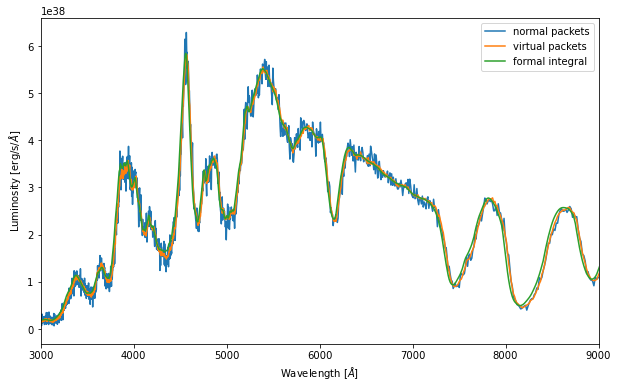

In [5]:
%pylab inline

spectrum = sim.runner.spectrum
spectrum_virtual = sim.runner.spectrum_virtual
spectrum_integrated = sim.runner.spectrum_integrated

figure(figsize=(10,6))
plot(spectrum.wavelength, spectrum.luminosity_density_lambda, label='normal packets')
plot(spectrum.wavelength, spectrum_virtual.luminosity_density_lambda, label='virtual packets')
plot(spectrum.wavelength, spectrum_integrated.luminosity_density_lambda, label='formal integral')
xlabel('Wavelength [$\AA$]')
ylabel('Luminosity [erg/s/$\AA$]')
legend()
xlim(3000, 9000)